In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [7]:
# Task 1: EDA

In [8]:
df = pd.read_csv("wine.csv")


In [10]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

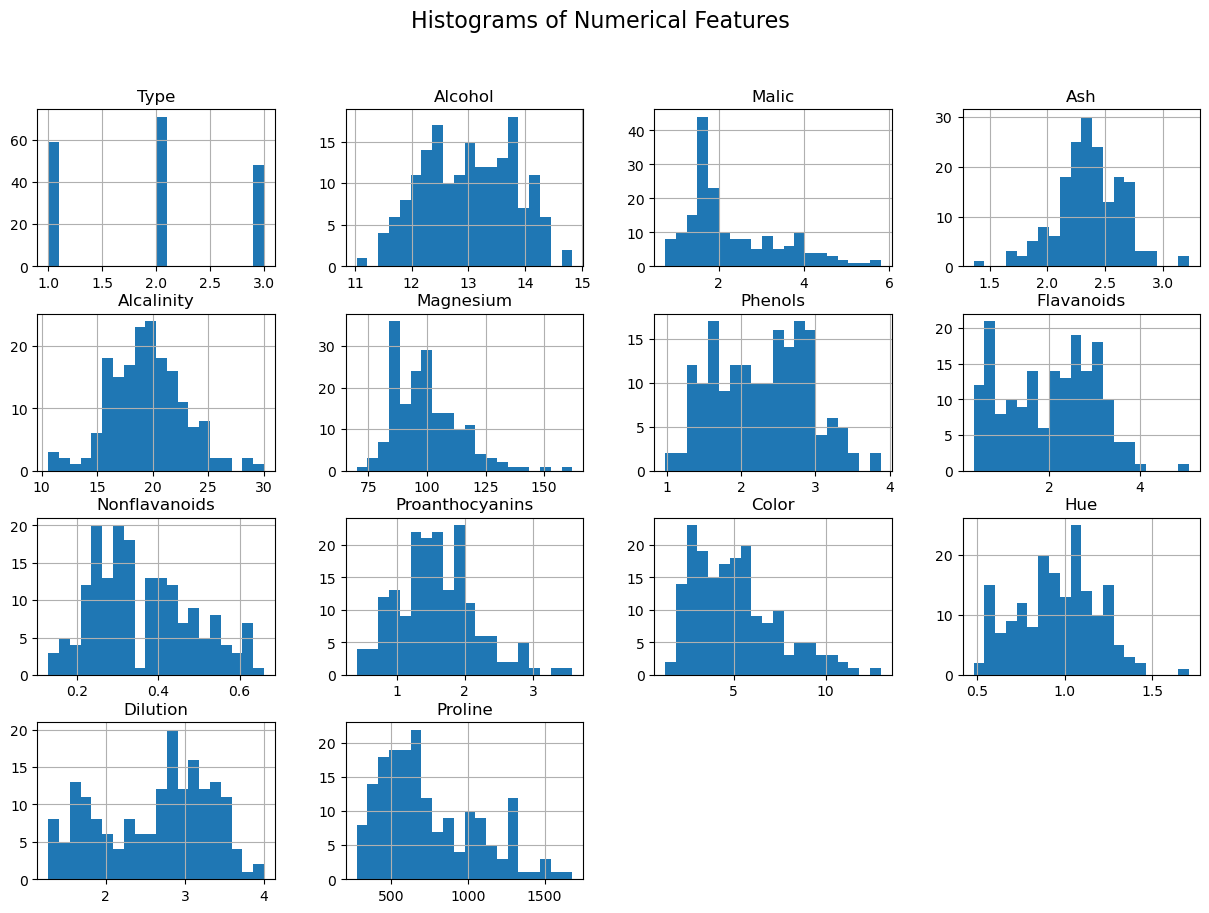

In [11]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

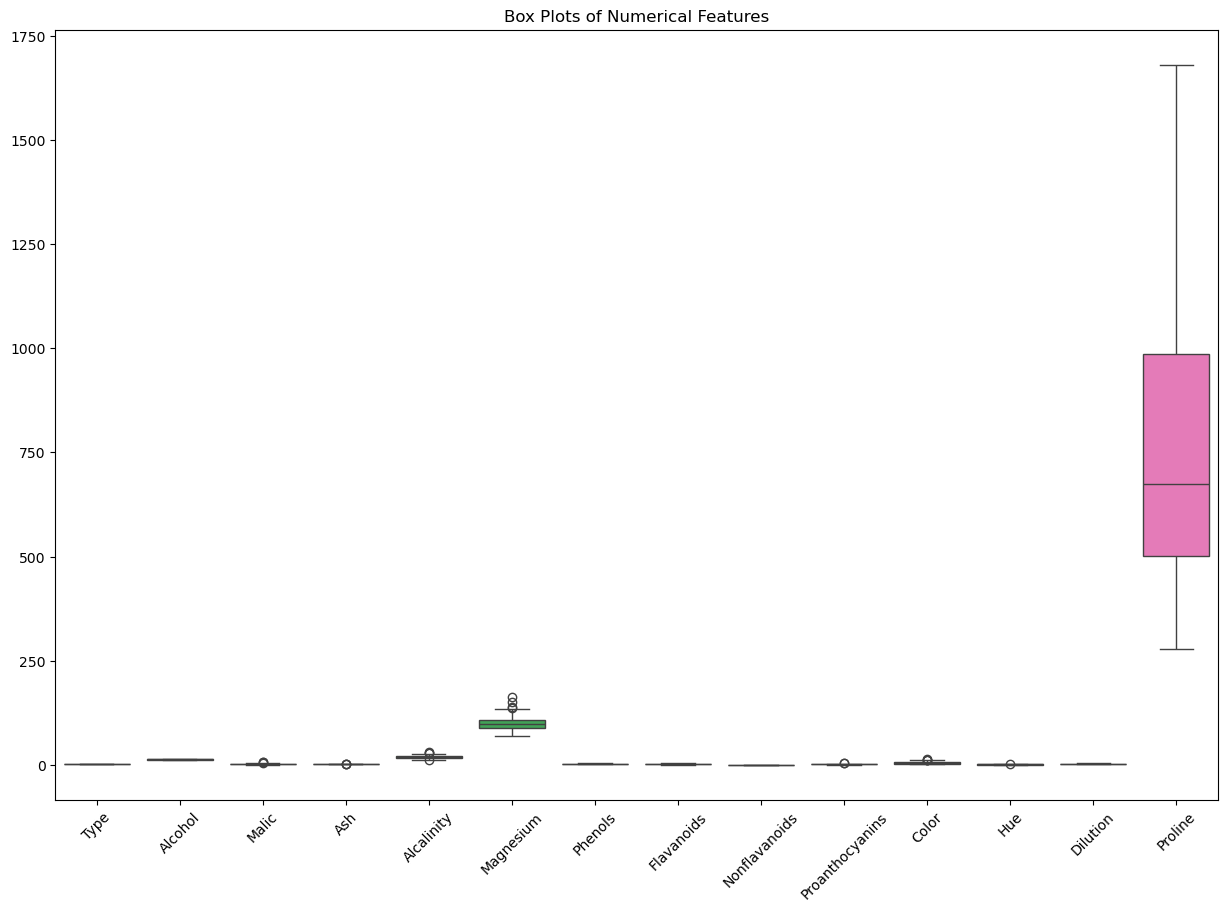

In [12]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

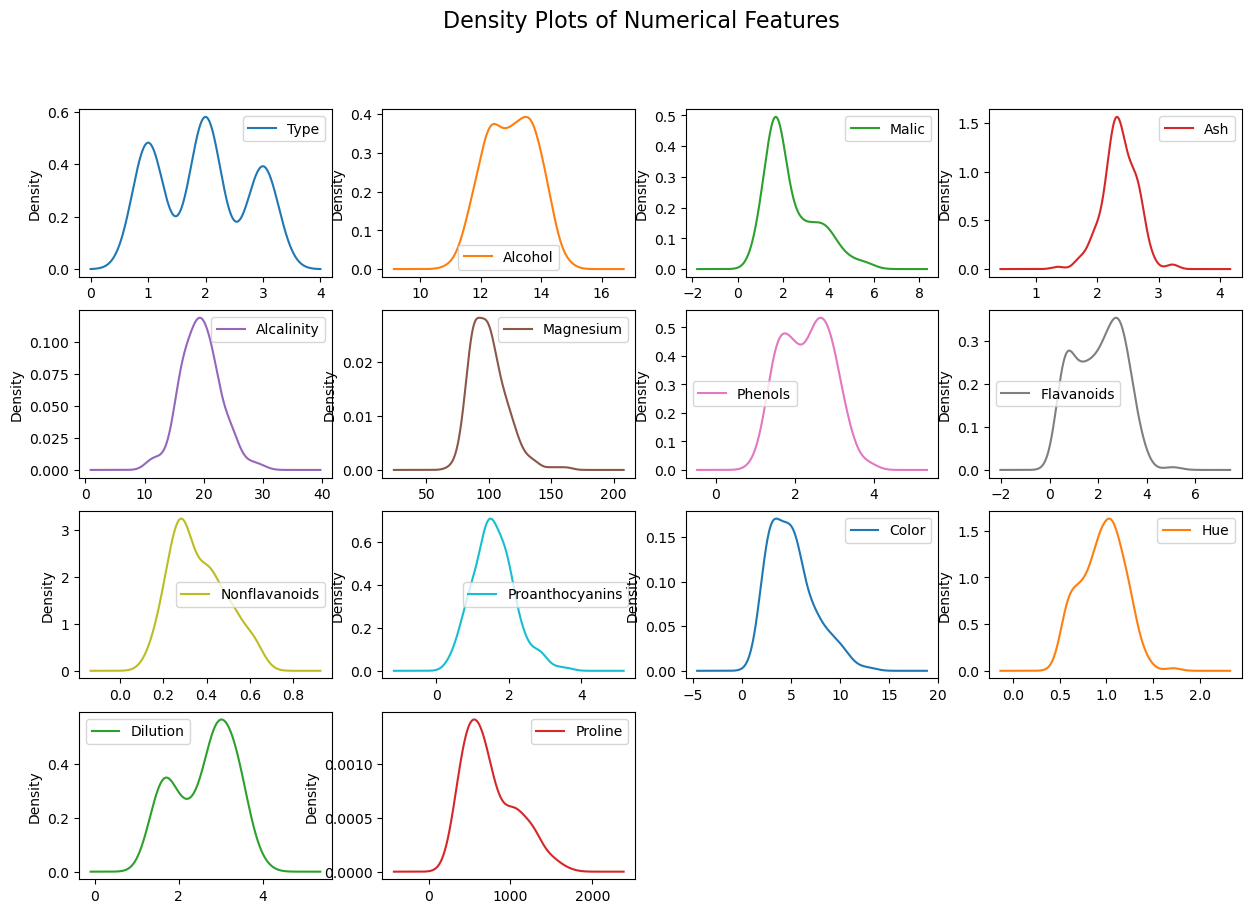

In [13]:
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.suptitle("Density Plots of Numerical Features", fontsize=16)
plt.show()

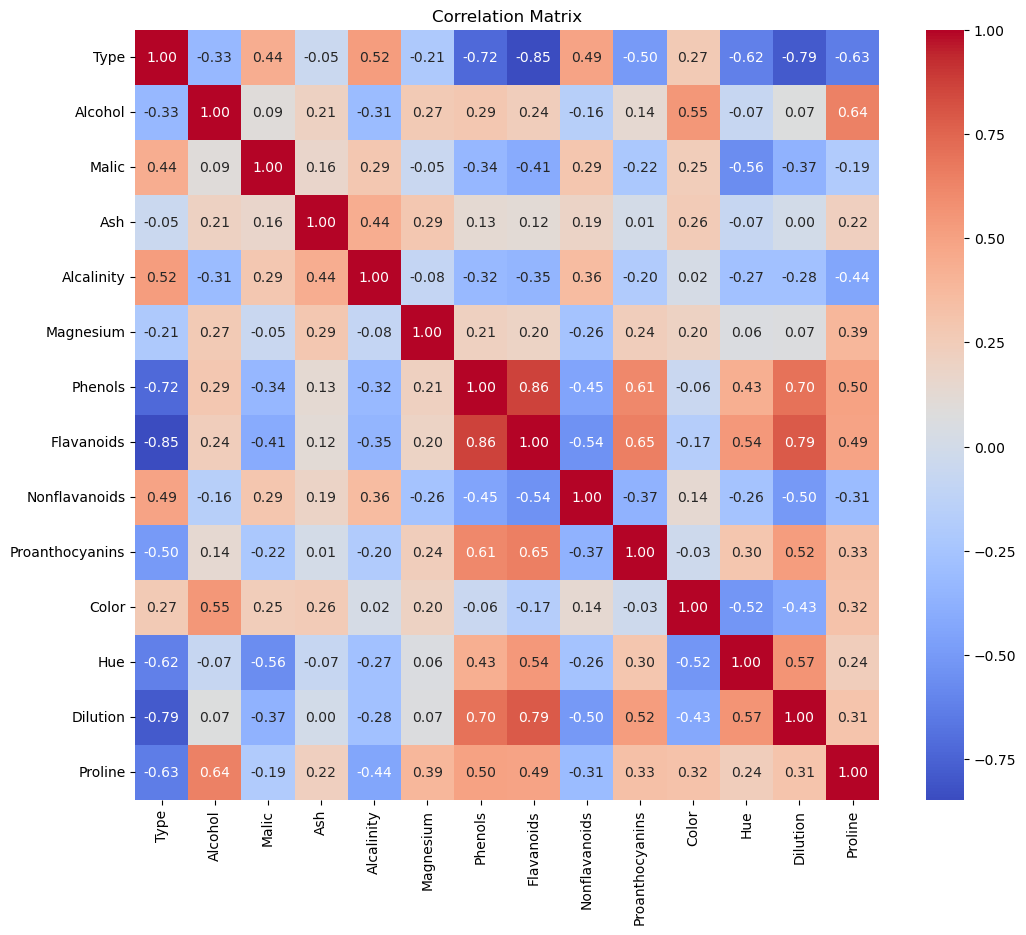

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Key Observations and Interpretations

1) Type (Wine Class) Correlations:

- Strong Negative with Phenols (-0.72), Flavonoids (-0.85), Dilution (-0.79), Proline (-0.63): This indicates that wine classes are strongly related to these features. Higher values of these features tend to be associated with certain wine classes, and lower values with others.
- Strong Positive with Alcalinity (0.52): Higher Alcalinity is associated with a different set of wine classes.
- Moderate Positive with Magnesium (0.52): Magnesium also shows a positive correlation with wine classes.
- These correlations suggest that these features are important in distinguishing between different wine types.

2) Correlations Among Features:

- Phenols and Flavonoids (0.86), Dilution (0.70), Proline (0.70): These features show strong positive correlations with each other. This suggests that wines with higher levels of phenols tend to have higher levels of flavonoids, dilution, and proline.
- Flavonoids and Dilution (0.79), Proline (0.79): Similar to the previous point, these features are closely related.
- Alcohol and Proline (0.64): Alcohol content has a moderately strong positive correlation with proline.
- Alcalinity and Magnesium (-0.32): These features show a moderate negative correlation. Higher alcalinity tends to be associated with lower magnesium levels.
- Color and Hue (-0.52): These features have a moderate negative correlation.

3) Weak Correlations:

Several feature pairs have weak correlations (close to 0), suggesting that they are relatively independent of each other. For example, 'Ash' shows weak correlations with most other features.

In [15]:
# Task 2: PCA
X = df.drop('Type', axis=1)
y = df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

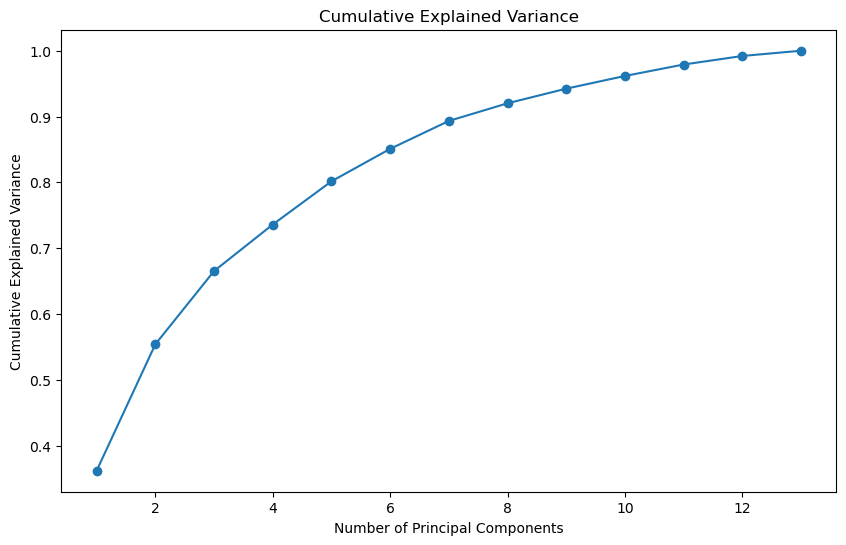

In [18]:
# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

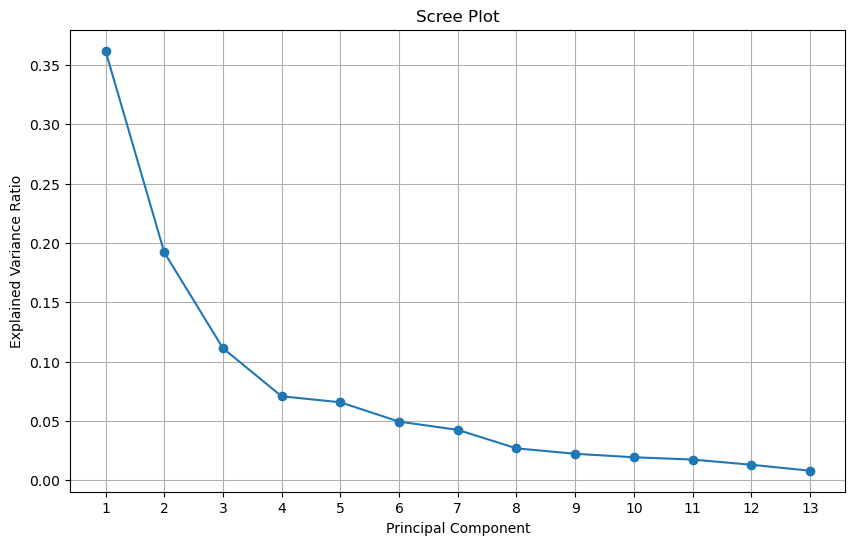

In [17]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure all PC numbers are shown
plt.grid(True)  # Add gridlines for better readability
plt.show()

In [20]:
# Determine optimal number of components 
n_components = (cumulative_variance < 0.95).sum() + 1
print(f"Optimal number of principal components: {n_components}")
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

Optimal number of principal components: 10


C:\Users\udits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


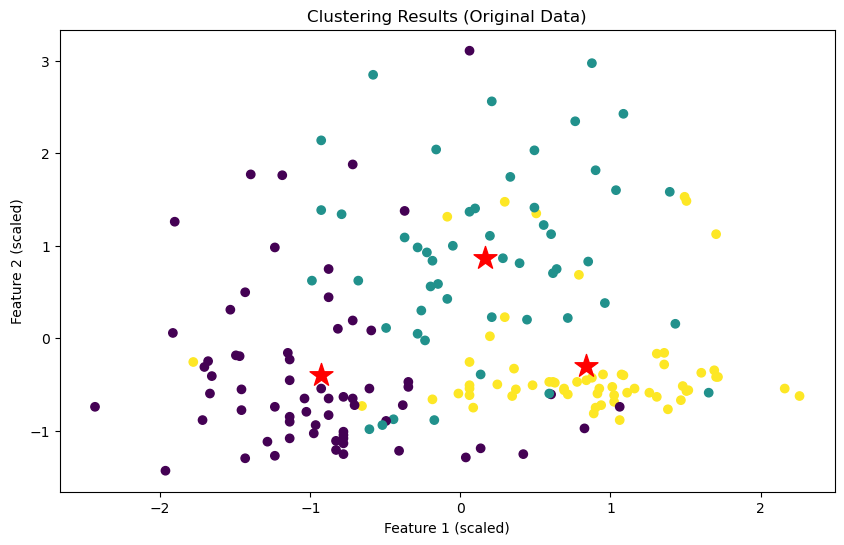

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.389187977718165


In [21]:
# Task 3: Clustering (Original Data)
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_original, cmap='viridis')
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], s=300, c='red', marker='*')
plt.title("Clustering Results (Original Data)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

silhouette_original = silhouette_score(X_scaled, labels_original)
davies_bouldin_original = davies_bouldin_score(X_scaled, labels_original)
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")

Interpretation 

1) Clustering Pattern: The scatter plot visually shows how the K-means algorithm has grouped the data points into three distinct clusters. You can observe the separation between the clusters.

2) Cluster Centroids: The red stars indicate the center points of each cluster. These centroids represent the "average" data point within each cluster.

3) Silhouette Score (0.2848):

- The Silhouette Score measures how similar each point in one cluster is to the points in its assigned cluster compared to points in other clusters.
- It ranges from -1 to 1:
- Values close to 1 indicate that the point is well-clustered.
- Values close to 0 suggest that the point is near the decision boundary between two clusters.
- Values close to -1 indicate that the point might be assigned to the wrong cluster.
- In this case, a score of 0.2848 suggests that the clusters are somewhat overlapping and not very well-separated. The clustering is not particularly strong.
  
4) Davies-Bouldin Index (1.3891):

- The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster.
- Lower values indicate better clustering
- A score of 1.3891 is relatively high, indicating that the clusters are not well-separated and there is significant overlap between them. This further supports the interpretation of a weak clustering result.



C:\Users\udits\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


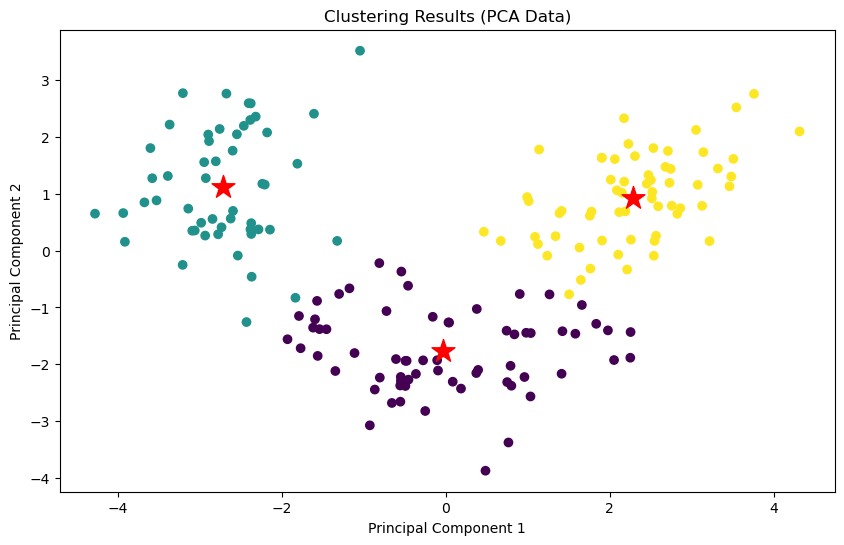

Silhouette Score (PCA Data): 0.2986748294369289
Davies-Bouldin Index (PCA Data): 1.3363263335155764


In [22]:
# Task 4: Clustering (PCA Data)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_optimal)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=labels_pca, cmap='viridis')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='*')
plt.title("Clustering Results (PCA Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

silhouette_pca = silhouette_score(X_pca_optimal, labels_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca_optimal, labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

Interpretation:

1) Clustering Pattern: The scatter plot shows how the K-means algorithm has grouped the data points into three clusters in the reduced, PCA-transformed space. You can observe the separation between the clusters.

2) Cluster Centroids: The red stars indicate the cluster centers in the PCA-transformed space. These centroids represent the "average" data point within each cluster after the data has been transformed by PCA.

3) Silhouette Score (0.2986):

- The Silhouette Score measures how similar each point is to its own cluster compared to other clusters.
- It ranges from -1 to 1, where higher values indicate better clustering.   
- A score of 0.2986 suggests that the clusters are still somewhat overlapping, but slightly better than the original scaled data clustering (0.2848). This indicates some improvement in cluster separation after PCA.  
4) Davies-Bouldin Index (1.3363):

- The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.   
- A score of 1.3363 is slightly lower than the original scaled data clustering (1.3891), suggesting a marginal improvement in cluster separation after PCA.

In [23]:
# Task 5: Comparison and Analysis
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.389187977718165
Silhouette Score (PCA Data): 0.2986748294369289
Davies-Bouldin Index (PCA Data): 1.3363263335155764


Interpretation Differences:

1) Silhouette Score:

- Original Data (0.2848): Indicates relatively weak clustering. The data points are not very well-separated, and there's a significant amount of overlap between clusters.
- PCA Data (0.2986): Shows a slight improvement. The data points are marginally better separated, but the clustering is still not very strong.

2) Davies-Bouldin Index:

- Original Data (1.3891): Suggests that the clusters are not well-separated and have considerable overlap. Higher values indicate poorer clustering.
- PCA Data (1.3363): Indicates a small improvement in cluster separation. The clusters are still not ideal, but they are slightly better defined than in the original data.
  

Key Differences Summarized:

- Improvement: The PCA-transformed data shows a marginal improvement in clustering performance compared to the original scaled data. This is supported by both the Silhouette Score (higher) and the Davies-Bouldin Index (lower).
- Magnitude: While there is an improvement, it's not a dramatic one. The scores are still relatively close, suggesting that the clusters are not significantly different.
- PCA's Role: PCA likely helped in reducing the impact of correlated features or noise in the original data, leading to slightly better-defined clusters. However, it didn't fundamentally change the data's inherent cluster structure.
- Interpretation: Both clustering results point towards relatively weak clustering, but the PCA-transformed data provides a slightly better representation of the underlying cluster structure.